We want to determine similarities and differences between the viral seqs we can get from GenBank and ViPR.

First, let's create an output folder where we will store the data we generate from this notebook. To do this, we'll import the pre-packaged os module, so that we can use the function os.mkdir("/path/to/directory").

In [1]:
import os #for os.mkdir
try: #Try to make output folder, if it doesn't already exist
    os.mkdir("outputs/")
except: #If it does exist, print this next line
    print("Creation of the directory failed, maybe it already exists.")

Creation of the directory failed, maybe it already exists.


Now, store the location of your downloaded fasta files to their corresponding variables below inside the quotation marks, to designate that the information is a "string" type.

In [2]:
genbank_fasta="../Examples/genbank-kobu.fasta" #'/path/to/genbank_fasta_file'
vipr_fasta="../Examples/vipr-kobu.fasta" #'/path/to/vipr_fasta_file'

We are now going to extract IDs from the fasta header. Let's start with our genbank_fasta and use the command open() to open the file, and then go line-by-line in a for-loop to take only the IDs and save them to a list.

In [3]:
genbank_ID_list = [] #Create blank list
with open(genbank_fasta) as file: #open the fasta formatted file
    for line in file: #go line by line
        line = line.strip() #take away the whitespace
        if not line: #if it's a blank line,
            continue #go to the next line
        if line.startswith(">"): #these ">" lines are the header info
            seq_header = line[1:].split('.')[0] #start from the second character, and save up to the first "."
            genbank_ID_list.append(seq_header) #Add the ID we just extracted to the list

In [4]:
print(len(genbank_ID_list[0]))

12


In [5]:
print(test_list[0][0]) 

NameError: name 'test_list' is not defined

We're going to quickly check what the first few elements in this list look like to make sure everything is running correctly.

In [6]:
print(genbank_ID_list[0:4]) #Print only elements 0, 1, 2, 3 from genbank_ID_list

['YP_002456506', 'ACI95948', 'AWB14573', 'AJT57879']


Confirming that the IDs seem correct, fill in the following box to do the same for the vipr fasta file:

In [7]:
vipr_ID_list = [] #Create blank list
with open(vipr_fasta) as file: #open the fasta formatted file
    for line in file: #go line by line
        line = line.strip() #take away the whitespace
        if not line: #if it's a blank line,
            continue #go to the next line
        if line.startswith(">"): #these ">" lines are the header info
            #seq_header = line[1:].split('|')[0].split(':')[1] #start from the second character, and save up to the first "."
            #seq_header = line[1:].split(':')[1].split('|')[0]
            seq_header = line[4:].split('|')[0]
            vipr_ID_list.append(seq_header) #Add the ID we just extracted to the list
#in
#the
#rest
#to
#generate
#ID
#list

In [8]:
#Use this space to test code or preview the finalized vipr_fasta
print(vipr_ID_list)

['BAA31356', 'AAV28657', 'ACX33797', 'ADN52304', 'ADN52312', 'ADN52311', 'ADN52306', 'ADN52305', 'AAY46271', 'AFV70595', 'BAB62889', 'AWF79099', 'QEA08638', 'AWK02691', 'BAC23066', 'AIF74251', 'AIF74258', 'APY16382', 'AZZ70013', 'QHA24623', 'ALM04213', 'AXY87954', 'AXE75324', 'AZS64123', 'AZS64124', 'AZS64125', 'QIE07158', 'ARW71933', 'AHK60486', 'AJP67529', 'AJP67528', 'AJP67530', 'AJP67527', 'AGH29114', 'AGC36402', 'AEO19724', 'AHH02469', 'QOW08372', 'QKI30369', 'AIN37087', 'AYM46576', 'AYM46575', 'AIS22688', 'AHL67639', 'QEV86990', 'QEV86991', 'ASS36975', 'AGU62946', 'QJF11790', 'BAS53432', 'BAS53431', 'AEL19656', 'ADB45876', 'AFR11851', 'ADG03747', 'AVH76468', 'AIK67137', 'AVX29483', 'AEM05831', 'AHF72574', 'AHY02128', 'AFS41248', 'AFX69272', 'AJW76498', 'AVE15813', 'AVE15814', 'AVE15815', 'AVE15816', 'AVE15817', 'QJW71472', 'AGY52598', 'AGY52599', 'ARS29593', 'ARS29603', 'ARS29602', 'ARS29601', 'ARS29598', 'ARS29597', 'ARS29610', 'ARS29594', 'ARS29609', 'ARS29608', 'ARS29607', 'AR

Now that we have two ID lists, let's finally compare them for overlaps and differences.

In [9]:
#we use set() here because it is a structure that ensures dupes don't exist.
#Dupes prevent use of these simplistic subtraction and ampersand operations.
#After we subtract using the easier-to-manipulate set() structures, we can stuff them back into a list using list()

#put the remaining genbank IDs in list format after subtracting vipr ids
unique_to_genbank = list(set(genbank_ID_list) - set(vipr_ID_list))

#put the remaining vipr IDs in list format after subtracting genbank ids
unique_to_vipr = list(set(vipr_ID_list) - set(genbank_ID_list))

#put common elements in list format
shared = list(set(vipr_ID_list) & set(genbank_ID_list))

Now let's save the files as text files. This is just to hone in on the idea that you can export the data you create here.

In [10]:
genbank_output_name="genbank_output" #set your output name inbetween the quotations

#open a new, writeable ("w") text file as the variable f
#the {0} is where your genbank_output_name will be inserted, so your named file will save within the outputs/ folder
with open("outputs/{0}.txt".format(genbank_output_name), "w") as f: 
    for element in unique_to_genbank: #loop through each element in the unique genbank ID list
        f.write("{}\n".format(element)) #use .write() to write the current element to the file designated f

Now, try creating textfiles for the unique_to_vipr and shared lists.

In [11]:
vipr_output_name="vipr_output" #set your output name inbetween the quotations
with open("outputs/{0}.txt".format(vipr_output_name), "w") as f: 
    for element in unique_to_vipr: #loop through each element in the unique genbank ID list
        f.write("{}\n".format(element)) #use .write() to write the current element to the file designated f
#Fill 
#in
#the
#rest
#to
#generate
#textfile

In [12]:
shared_output_name="shared_output" #set your output name inbetween the quotations
with open("outputs/{0}.txt".format(shared_output_name), "w") as f: 
    for element in shared: #loop through each element in the unique genbank ID list
        f.write("{}\n".format(element)) #use .write() to write the current element to the file designated f
#Fill
#in
#the
#rest
#to
#generate
#textfiles

For the finishing touches, let's visualize the data. We'll use a more readable, histograph version of venn diagrams, the upsetplot. Then we will use matplotlib's pyplot() function to actually display the plot in the Jupyter notebook cell.

To install upsetplot, open your terminal window and paste/execute the following line of code:
```conda install -c conda-forge upsetplot```

Documentation here: https://pypi.org/project/UpSetPlot/


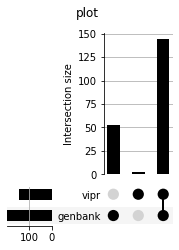

In [15]:
from upsetplot import from_memberships, plot
from matplotlib import pyplot as plt
#Make sure the matplotlib output is displayed in jupyter notebook
%matplotlib inline

#Set the names for your two lists to compare along with the title of your final plot
genbank_name="genbank"
vipr_name="vipr"
plot_title="plot"

upset_data = from_memberships(
    [[genbank_name], #This label corresponds to elements unique to genbank ID list
    [vipr_name], #This label corresponds to elements unique to vipr ID list
    [genbank_name,vipr_name], #This label corresponds to elements common to both lists
    ],
    data=[len(unique_to_genbank),len(unique_to_vipr),len(shared)] #calling back the lists you generated earlier, use len() to set the lengths of the histograms to be displayed at each of the membership labels above.
)

#Note: The upset_data format was line-separated to make it easier to comment.
#The following command is identical:
#set_data = from_memberships([[genbank_name],[vipr_name],[genbank_name,vipr_name],],data=[len(unique_to_genbank),len(unique_to_vipr),len(shared)])

#Plot the data
plot(upset_data)
plt.suptitle('{0}'.format(plot_title))
plt.show()

Congrats, you have now compared two ID lists from two fasta files of different origins.